In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
from scipy.optimize import fsolve
import scienceplots
from matplotlib.ticker import FormatStrFormatter
plt.style.use(['science','notebook','grid'])
import pandas as pd

As presented at "Impact of the symmetry energy on the outer crust of nonaccreting neutron stars", the energy per nucleon is obtained using:
$$ \epsilon_n(x,y) = m_py + m_n(1-y) - \alpha_n + \frac{\alpha_s}{x} + \alpha_c x^2y^2 + \alpha_{\alpha}(1-2y)^2$$
where $x \equiv A^{1/3}$ and $y \equiv Z/A $. 

Our first objective is calculating the optimal values of x and y, which minimize the energy per nucleon. This pair of x and y will be the most stable nucleous according to the number of Protons and Neutrons. In order to calculate this pair, the derivatives of the energy must be set equal to zero:
$$\\ \left(\frac{\partial \epsilon_n}{\partial x}\right)_y = - \frac{\alpha_s}{x^2} + 2 \alpha_c x y^2 = 0$$
$$ \left(\frac{\partial \epsilon_n}{\partial y}\right)_x = -\Delta m + 2 \alpha_c x^2 y - 4 \alpha_{\alpha}(1-2y)=0 \\$$
where $\Delta m \equiv m_n - m_p$. The analytic solutions of those equations are:
$$ A = x^3 = \left(\frac{\alpha_s}{2 \alpha_c}\right)\frac{1}{y^2} \\ \\ \\ $$
$$ y = \frac{1 + \left(\frac{\Delta m}{4 \alpha_{\alpha}}\right)}{2+ \left(\frac{\alpha_c}{2\alpha_{\alpha}}\right)x^2} $$

In [2]:
Av = 15.71511 #MeV
As = 17.53638 #MeV
Ac = 0.71363 #MeV
Aa = 23.37837 #MeV
dm = 1.293 #(939.565 - 938.272)MeV 

In [3]:
def y(x):
    return np.sqrt(As/(2*Ac*x*x*x))
def f(x):
    return (1 + (dm/(4*Aa)))/(2 + Ac*x*x/(2*Aa)) - np.sqrt(As/(2*Ac*x*x*x))

In [4]:
# Calculating the x where f=0, therefore calculating the x which minimizes the energy.
sol = root(f,3)
xstable = sol['x'][0]
ystable = y(xstable)
Astable = xstable**3
Zstable = ystable*Astable
(Zstable,Astable)

(27.060587770161934, 59.598811290734645)

Therefore, the most stable element is the one with $Z = 27$ and $A = 59$. The theory suggests that the most stable element is $_{26}$Fe, which makes our calculation sufficient enough, considering the simplicity of our model.

Secondly, we are assuming our model contains a relativistic Fermi gas of electrons. That means Fermi Momentum, $p_F \equiv  (3\pi^2 n)^{1/3} $, is added in our model as a free parameter. In that case, the formula of energy per nucleon transforms into:
$$ \epsilon_n(x,y,p_F) = m_py + m_n(1-y) - \alpha_n + \frac{\alpha_s}{x} + \alpha_c x^2y^2 + \alpha_{\alpha}(1-2y)^2 + \frac{3}{4}y^{4/3}p_F - C_l x^2 y^2 p_F$$

As previously done, the derivatives are set equal to zero, by treating $p_F$ as a constant:
$$ \\ \left(\frac{\partial \epsilon_n}{\partial x}\right)_{y,p_F} = - \frac{\alpha_s}{x^2} + 2 (\alpha_c - C_l p_F)x y^2 = 0 $$
$$ \left(\frac{\partial \epsilon_n}{\partial y}\right)_{x,p_F} = -\Delta m + 2 (\alpha_c - C_l p_F) x^2 y - 4 \alpha_{\alpha}(1-2y) + y^{1/3}p_F =0 \\ $$

This system of equations is solved multiple times, by varying $p_F$ from 0 to 35 $MeV$, obtaining the desired sets of $x$ and $y$ in each case. This operation will be done two times, with two different values of $C_l$. At first, the calculations are done using a value of $C_l = 0.0034$. After that, the same calculations take place using $C_l = 0$. 

In [5]:
def g(S,pF, Cl=0.0034):
    x,y = S
    eq1 = - As/x**2 + 2*(Ac - Cl*pF)*x*y*y
    eq2 = -dm + 2*(Ac - Cl*pF)*x*x*y - 4*Aa*(1-2*y) + np.cbrt(y)*pF
    return [eq1,eq2]

In [6]:
pf_values = np.linspace(0.1,35,100)
# For Cl = 0.0034
res = []
for pf in pf_values:
    x,y = fsolve(g,(5,5),args=(pf))
    n = pf**3/(3*np.pi**2)
    res.append({'pF': pf, 'n': n, 'x': x, 'y': y})
df = pd.DataFrame(res)
# For Cl = 0
resCl0 = []
for pf in pf_values:
    x,y = fsolve(g,(5,5),args=(pf,0))
    n = pf**3/(3*np.pi**2)
    resCl0.append({'pF': pf, 'n': n, 'x': x, 'y': y})
dfCl0 = pd.DataFrame(resCl0)

After obtaining the lists of the most stable $x$ and $y$ pairs for each value of $p_F$, the results are plotted in the following figures.

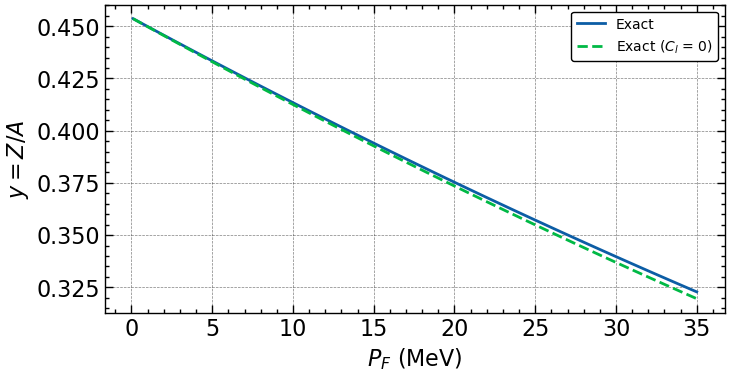

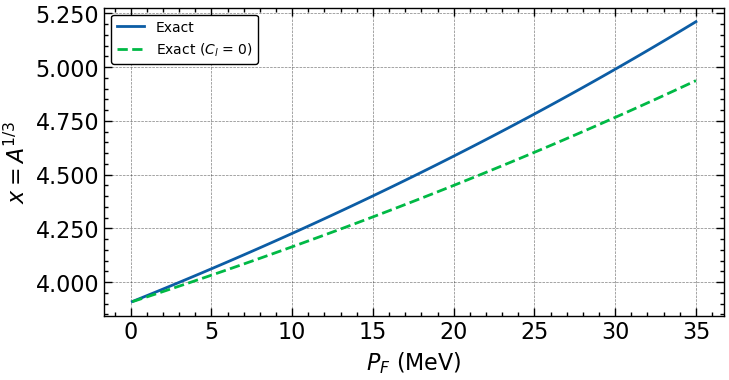

In [7]:
plt.figure(figsize=(8, 4), dpi=100)
plt.plot(pf_values,df['y'], label='Exact')
plt.plot(pf_values,dfCl0['y'],linestyle='--', label='Exact ($C_l$ = 0)')
plt.xlabel('$P_F$ (MeV)')
plt.ylabel('$y = Z/A$')
plt.legend(frameon=True, edgecolor='black', fontsize=10)
plt.show()
plt.figure(figsize=(8, 4), dpi=100)
plt.plot(pf_values,df['x'],label='Exact')
plt.plot(pf_values,dfCl0['x'],linestyle='--',label='Exact ($C_l$ = 0)')
plt.xlabel('$P_F$ (MeV)')
plt.ylabel('$x = A^{1/3}$')
plt.legend(frameon=True, edgecolor='black', fontsize=10)

ax = plt.gca()
ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))

plt.show()

In the next part of our analysis, we calculate the structure of the crust with respect to the mass density $\rho (g/cm^3)$. The formula of mass density, assuming that $m_n \equiv m_p = m$, is the following:
$$ \rho = n\cdot m$$
where $n$ is the baryon density and $m$ is the mass of a single baryon. In order to simplify the problem, we use natural units, where $\hbar \equiv c \equiv 1$. Having in mind that $\hbar \cdot c = 197 MeV \cdot fm$, we calculate that:
$$ 1 g/cm^3 = 4.24742944 \cdot 10^{-6} MeV^4$$


In [8]:
m = 939 # MeV
g_cm3_to_mev4 = 4.24742944e-6

Trying to replicate the analysis of the previously mentioned paper, the density values of interest range from $10^6 g/cm^3$ to neutron's drip density ($\rho_{drip} \approx 4\cdot 10^{11} g/cm^3$). Their units are changed into $MeV^4$ and then the baryon density $n$ is calculated in each case. According to this value, a fermi momentum value, $p_{F}$, is calculated for every mass density. Having the values of $p_F$, we evaluate the $(x,y)$ sets that make the system have the least energy, using the formulas of the previous model. So, having these parameters calculated, we can specify the number of protons and neutrons that exist in each value of mass density.

In [9]:
rho = np.logspace(6,11.5,2000)
rho = rho*g_cm3_to_mev4
n = rho/m
pfermi = (3*np.pi**2*n)**(1/3)

In [10]:
resfinal = []
for pf in pfermi:
    x,y = fsolve(g,(5,5),args=(pf))
    A = int(x**3)
    Z = int(A*y)
    N = A-Z
    resfinal.append({'pF': pf, 'A': A, 'Z': Z, 'N': N})
dffinal = pd.DataFrame(resfinal)

In [11]:
dffinal

,pF,A,Z,N
0,0.511635,60,27,33
1,0.512717,60,27,33
2,0.513801,60,27,33
3,0.514887,60,27,33
4,0.515975,60,27,33
...,...,...,...,...
1995,34.564108,139,45,94
1996,34.637177,140,45,95
1997,34.710399,140,45,95
1998,34.783777,140,45,95


Having all the data in a table, we can proceed into plotting our results:

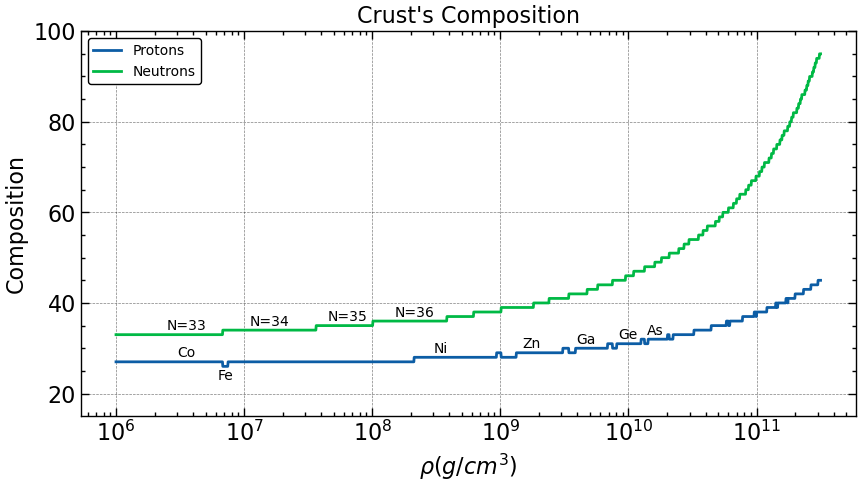

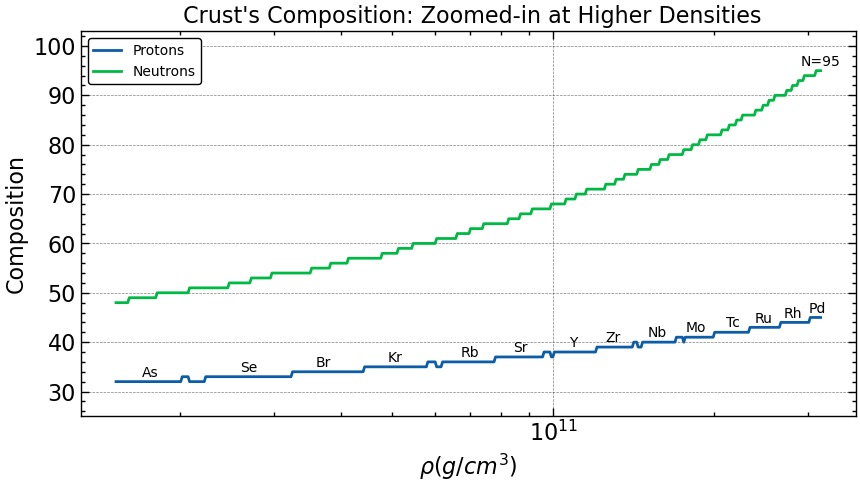

In [12]:
plt.figure(figsize=(10, 5), dpi=100)
plt.title("Crust's Composition")
plt.plot(rho/g_cm3_to_mev4,dffinal['Z'], label='Protons')
plt.plot(rho/g_cm3_to_mev4,dffinal['N'], label='Neutrons')
plt.ylim([15, 100])
plt.xscale('log')
plt.legend(frameon=True, edgecolor='black', fontsize=10)
plt.ylabel('Composition')
plt.xlabel(r'$\rho(g/cm^3)$')
plt.text(3e6, 28, 'Co')
plt.text(6.2e6, 23, 'Fe')
plt.text(3e8, 29, 'Ni')
plt.text(1.5e9, 30, 'Zn')
plt.text(3.9e9, 31 ,'Ga')
plt.text(8.4e9, 32 ,'Ge')
plt.text(1.4e10, 33 ,'As')
plt.text(2.5e6, 34, 'N=33')
plt.text(1.1e7, 35, 'N=34')
plt.text(4.5e7, 36, 'N=35')
plt.text(1.5e8, 37, 'N=36')
plt.show()

plt.figure(figsize=(10, 5), dpi=100)
plt.title(" Crust's Composition: Zoomed-in at Higher Densities")
plt.plot(rho[-480:]/g_cm3_to_mev4,dffinal['Z'][-480:], label='Protons')
plt.plot(rho[-480:]/g_cm3_to_mev4,dffinal['N'][-480:], label='Neutrons')
plt.xscale('log')
plt.ylim([25, 103])
plt.legend(frameon=True, edgecolor='black', fontsize=10)
plt.ylabel('Composition')
plt.xlabel(r'$\rho(g/cm^3)$')
plt.text(1.7e10, 33 ,'As')
plt.text(2.6e10, 34 ,'Se')
plt.text(3.6e10, 35 ,'Br')
plt.text(4.9e10, 36 ,'Kr')
plt.text(6.7e10, 37 ,'Rb')
plt.text(8.4e10, 38 ,'Sr')
plt.text(1.07e11, 39 ,'Y')
plt.text(1.25e11, 40 ,'Zr')
plt.text(1.5e11, 41 ,'Nb')
plt.text(1.77e11, 42 ,'Mo')
plt.text(2.1e11, 43 ,'Tc')
plt.text(2.38e11, 44 ,'Ru')
plt.text(2.7e11, 45 ,'Rh')
plt.text(3e11, 46 ,'Pd')
plt.text(2.9e11,96, 'N=95')
plt.show()

As it becomes clear, our model provides us a very different result than that of the realistic models used in the paper. That was expected if we keep in mind how much simpler our model was.   